# PREDICTING HOMELESSNESS IN AMERICA


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import plotly_express as px

# EDA  and Feature Engineering

In [2]:
df = pd.read_csv('feat_data.csv')

In [3]:
df.head()

,Unnamed: 0,state,number,year,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,...,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count,mental_health_budget
0,0,alabama,AL-500,2007,845208,104742,3203,656,25480,1839,...,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,62570748
1,1,alabama,AL-500,2008,845208,105612,2172,976,25762,1722,...,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2104,67101063
2,2,alabama,AL-500,2009,845208,106482,1785,945,26244,1615,...,68.87,25.15,3.43,0.20,1.44,0.03,0.77,0.12,2273,65833251
3,3,alabama,AL-500,2010,853551,107353,2486,1605,27098,1525,...,65.91,26.20,4.90,0.22,1.64,0.02,0.99,0.10,2273,66739153
4,4,alabama,AL-500,2011,862556,108846,3708,2257,27532,1459,...,64.90,26.95,4.82,0.23,1.80,0.02,1.10,0.16,1950,67564011


In [4]:
df.drop(['Unnamed: 0','state','number','year'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 29 columns):
population                    3203 non-null int64
renter_occupied_households    3203 non-null int64
eviction_filings              3203 non-null int64
evictions                     3203 non-null int64
total_ssi                     3203 non-null int64
aged_ssi                      3203 non-null int64
disbl_ssi                     3203 non-null int64
18_und_ssi                    3203 non-null int64
18_64_ssi                     3203 non-null int64
65_ovr_ssi                    3203 non-null int64
poverty_rate                  3203 non-null float64
median_gross_rent             3203 non-null float64
median_household_income       3203 non-null float64
median_property_value         3203 non-null float64
avg_rent_burden               3203 non-null float64
eviction_rate                 3203 non-null float64
eviction_filing_rate          3203 non-null float64
unemploy_rate                

In [6]:
df.isnull().any()

population                    False
renter_occupied_households    False
eviction_filings              False
evictions                     False
total_ssi                     False
aged_ssi                      False
disbl_ssi                     False
18_und_ssi                    False
18_64_ssi                     False
65_ovr_ssi                    False
poverty_rate                  False
median_gross_rent             False
median_household_income       False
median_property_value         False
avg_rent_burden               False
eviction_rate                 False
eviction_filing_rate          False
unemploy_rate                 False
pct_renter_occupied           False
pct_white                     False
pct_af_am                     False
pct_hispanic                  False
pct_am_ind                    False
pct_asian                     False
pct_nh_pi                     False
pct_multiple                  False
pct_other                     False
homeless_count              

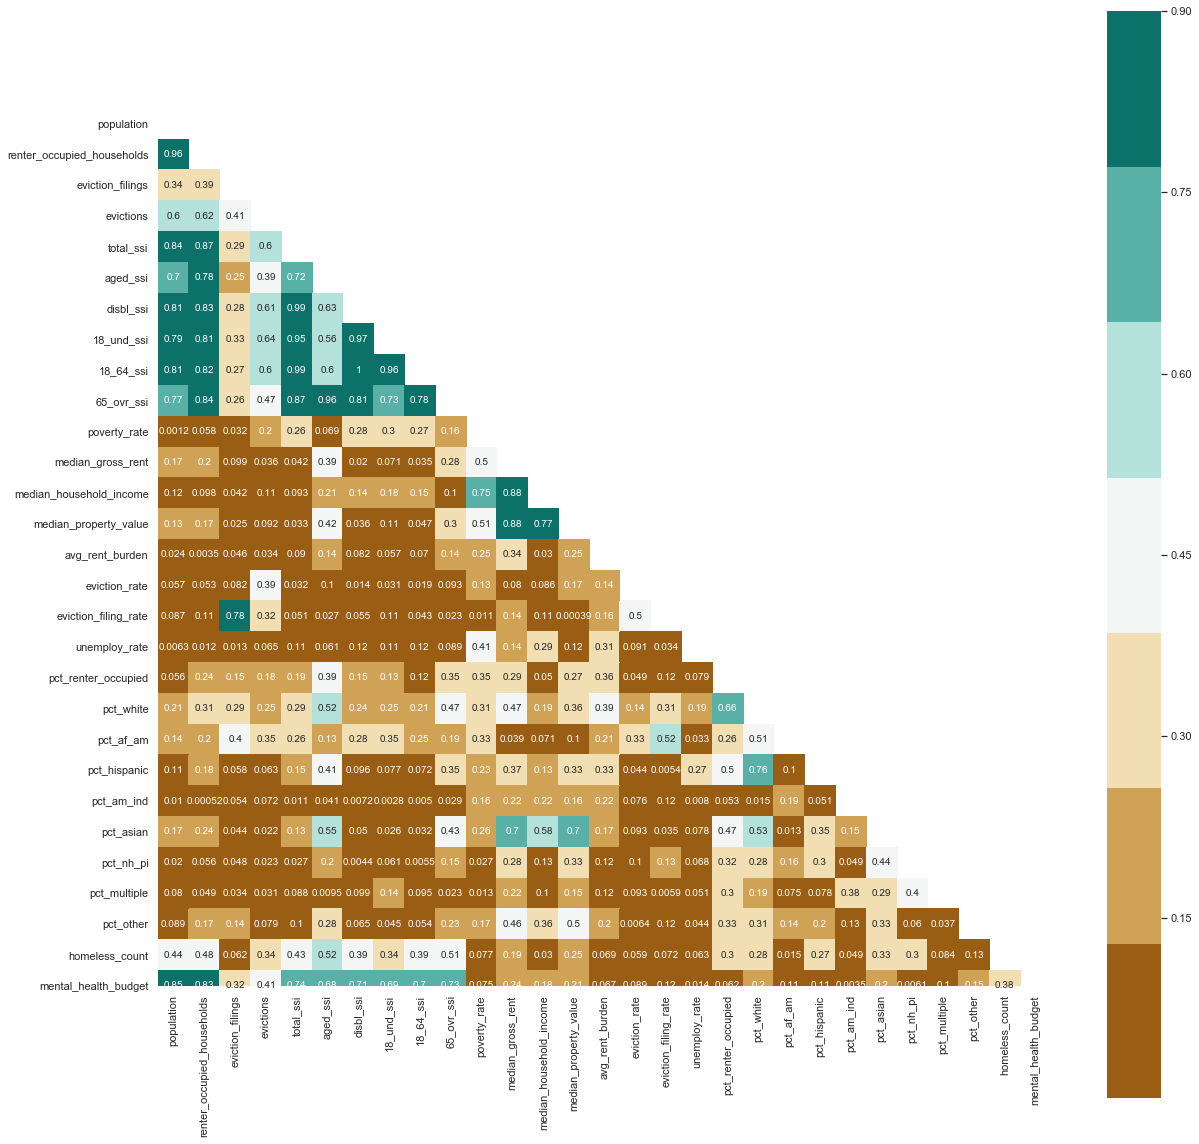

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
corr = df.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, vmax=.9, square=True, cmap= sns.color_palette("BrBG", 7))

In [8]:
df.columns

Index(['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', '18_und_ssi',
       '18_64_ssi', '65_ovr_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count', 'mental_health_budget'],
      dtype='object')

In [9]:
df.rename({'18_und_ssi': 'juvenile_ssi', '18_64_ssi': 'adult_ssi','65_ovr_ssi': 'senior_ssi' }, axis=1, inplace=True)

In [10]:
graphs1 =df[['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi']]

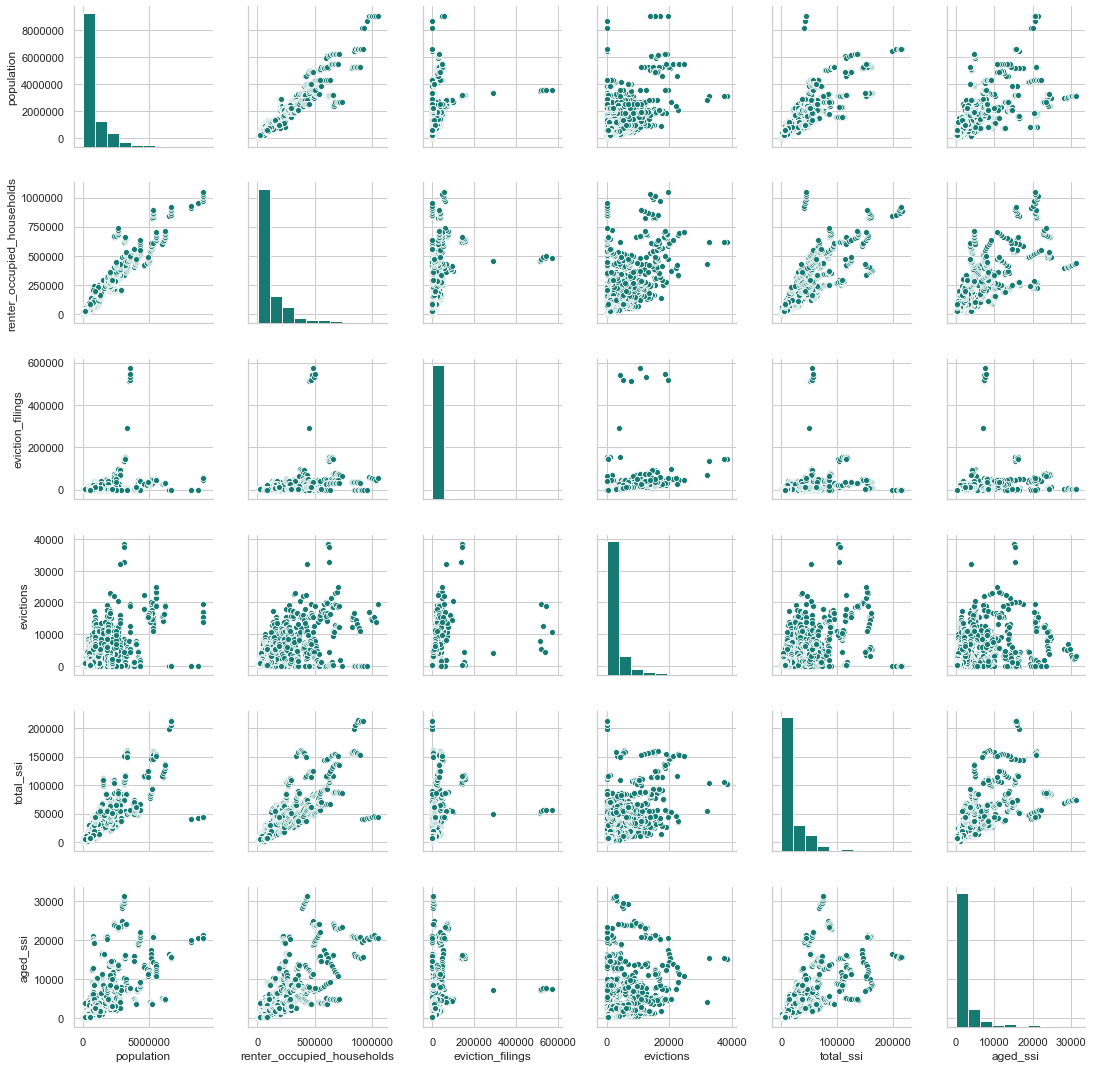

In [11]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs1)

In [12]:
graphs2 = df[['disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent']]

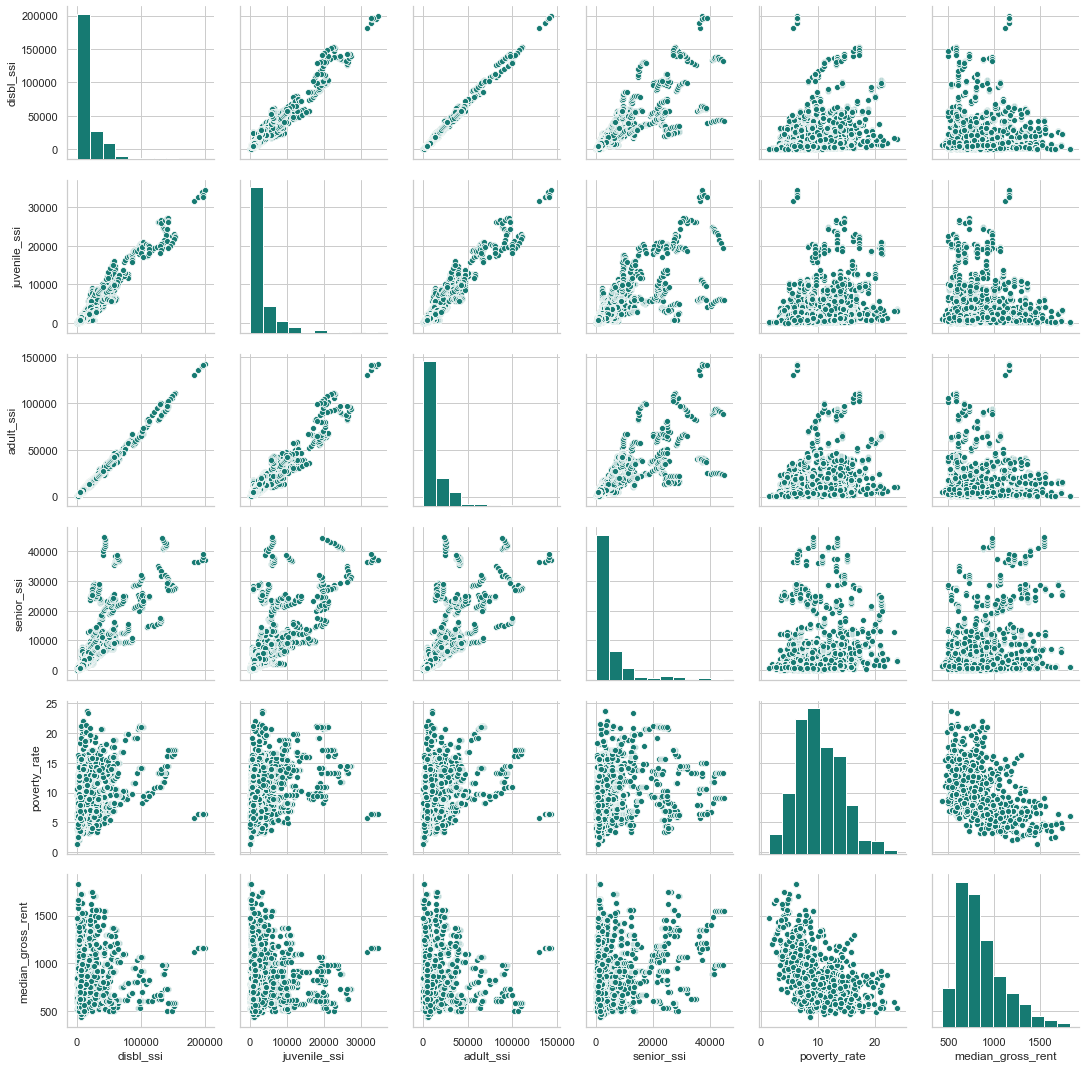

In [13]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs2)

In [14]:
graphs3 = df[['median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied']]

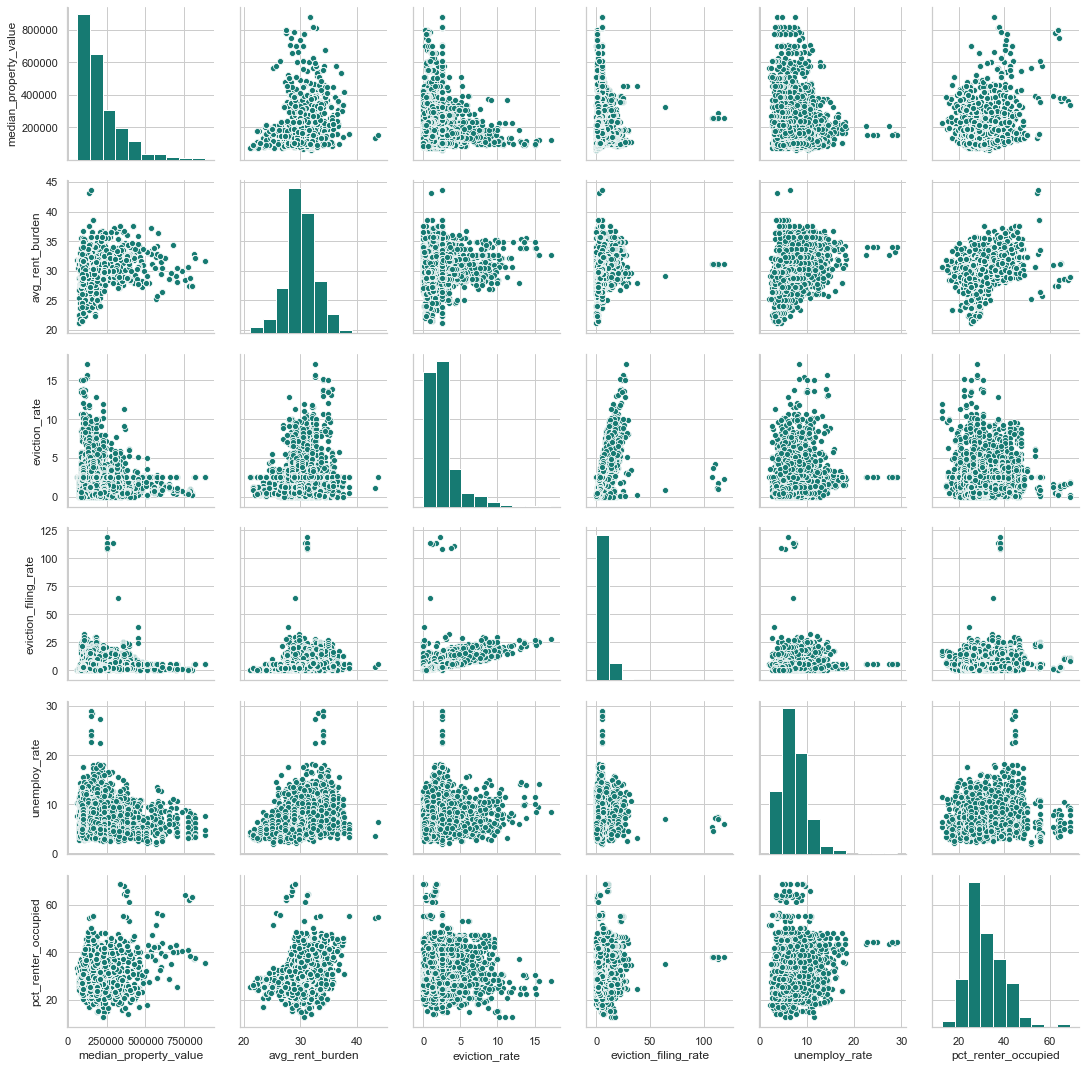

In [15]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs3)

In [16]:
graphs4 = df[['pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_multiple']]

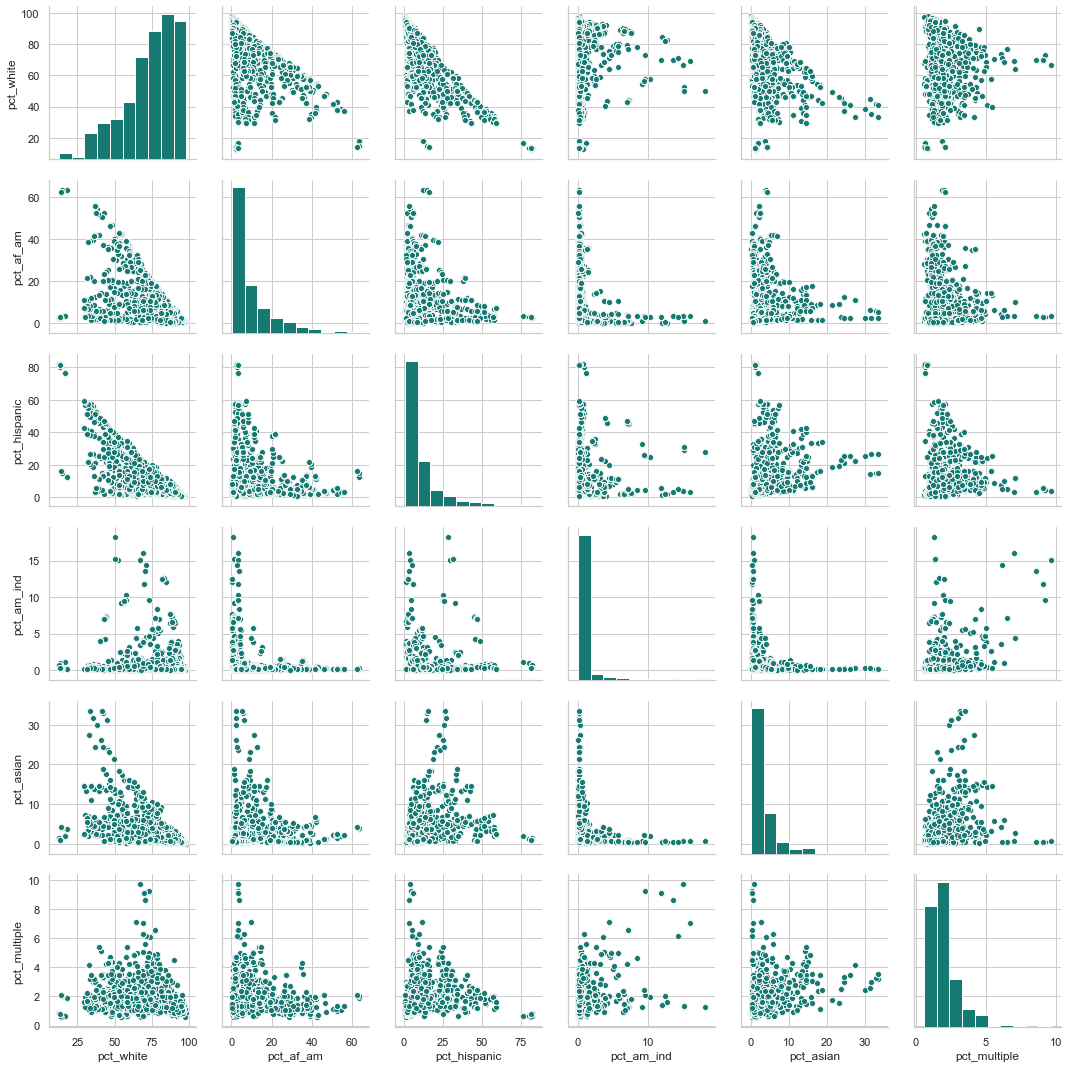

In [17]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs4)

In [18]:
graphs5 = df[['pct_other',
       'homeless_count', 'mental_health_budget','median_household_income']]

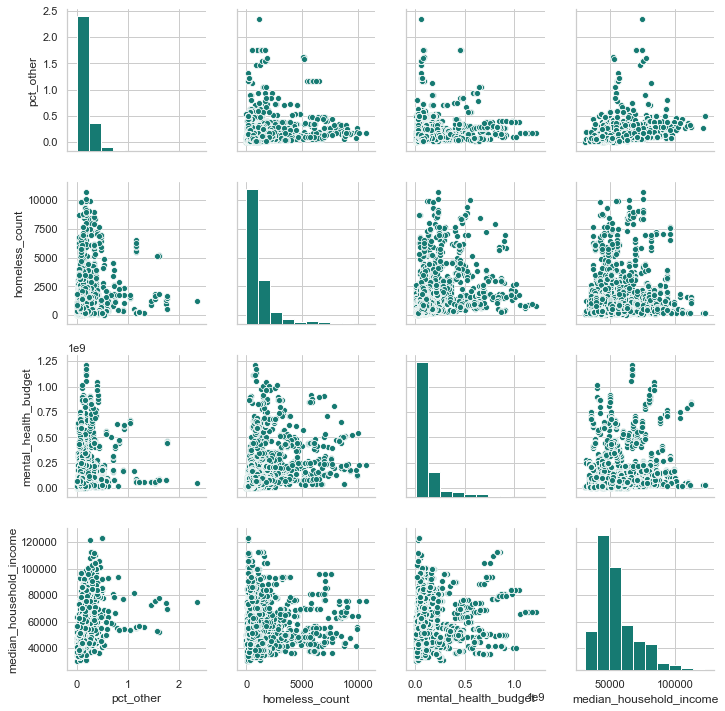

In [19]:
current_palette = sns.color_palette("BrBG_r")
sns.set_palette(current_palette)
sns.pairplot(graphs5)

## OLS, Linear Regression Model

In [20]:
outcome = 'homeless_count'

x_cols = ['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi', 'poverty_rate', 'median_gross_rent',
       'median_household_income', 'median_property_value', 'avg_rent_burden',
       'eviction_rate', 'eviction_filing_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
        'mental_health_budget']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         homeless_count   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     85.50
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:01   Log-Likelihood:                -27135.
No. Observations:                3203   AIC:                         5.433e+04
Df Residuals:                    3174   BIC:                         5.450e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -5.47e+05   2.48e+05     -2.206      0.027   -1.03e+06   -6.09e+04
population                    -0.0007      0.000     -6.176      0.000      -0.001      -0.000
renter_occupied_households     0.0066      0.001      7.443      0.000       0.005       0.008
eviction_filings              -0.0126      0.002     -7.022      0.000      -0.016      -0.009
evictions                      0.1006      0.010     10.384      0.000       0.082       0.120
total_ssi                      0.5607      0.388      1.444      0.149      -0.201       1.322
aged_ssi                       0.4382      0.088      5.005      0.000       0.267       0.610
disbl_ssi                     -0.0046      0.072     -0.064      0.949      -0.146       0.136
juvenile_ssi                  -0.6491      0.432     -1.502      0.133      -1.497       0.198
adult_ssi                     -0.4864      0.432     -1.126      0.260      -1.334       0.361
senior_ssi                    -0.8704      0.436     -1.996      0.046      -1.725      -0.015
poverty_rate                 -16.2712     12.927     -1.259      0.208     -41.618       9.075
median_gross_rent              2.4774      0.379      6.544      0.000       1.735       3.220
median_household_income       -0.0596      0.006    -10.033      0.000      -0.071      -0.048
median_property_value          0.0017      0.000      4.143      0.000       0.001       0.003
avg_rent_burden              -43.4572     11.974     -3.629      0.000     -66.935     -19.980
eviction_rate                -64.0654     17.195     -3.726      0.000     -97.780     -30.351
eviction_filing_rate          23.0830      7.930      2.911      0.004       7.535      38.631
unemploy_rate                 -5.1086      8.817     -0.579      0.562     -22.396      12.179
pct_renter_occupied          -22.0730      5.760     -3.832      0.000     -33.366     -10.780
pct_white                   5504.6469   2478.707      2.221      0.026     644.618    1.04e+04
pct_af_am                   5500.3380   2478.661      2.219      0.027     640.399    1.04e+04
pct_hispanic                5511.9088   2478.649      2.224      0.026     651.994    1.04e+04
pct_am_ind                  5544.0129   2478.610      2.237      0.025     684.174    1.04e+04
pct_asian                   5545.6713   2478.355      2.238      0.025     686.332    1.04e+04
pct_nh_pi                   6585.6144   2480.522      2.655      0.008    1722.025    1.14e+04
pct_multiple                5449.8024   2478.825      2.199      0.028     589.541    1.03e+04
pct_other                   5225.8368   2484.201      2.104      0.035     355.036    1.01e+04
mental_health_budget        5.731e-07   2.71e-07      2.116      0.034     4.2e-08     1.1e-06
===========================================

In [21]:
# unemployment and disability_ssi have high p-vals

In [22]:
cols = ['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi','median_property_value', 
       'eviction_rate', 'eviction_filing_rate',
       'pct_white', 'pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
       'homeless_count','mental_health_budget']

In [23]:
len(cols)

23

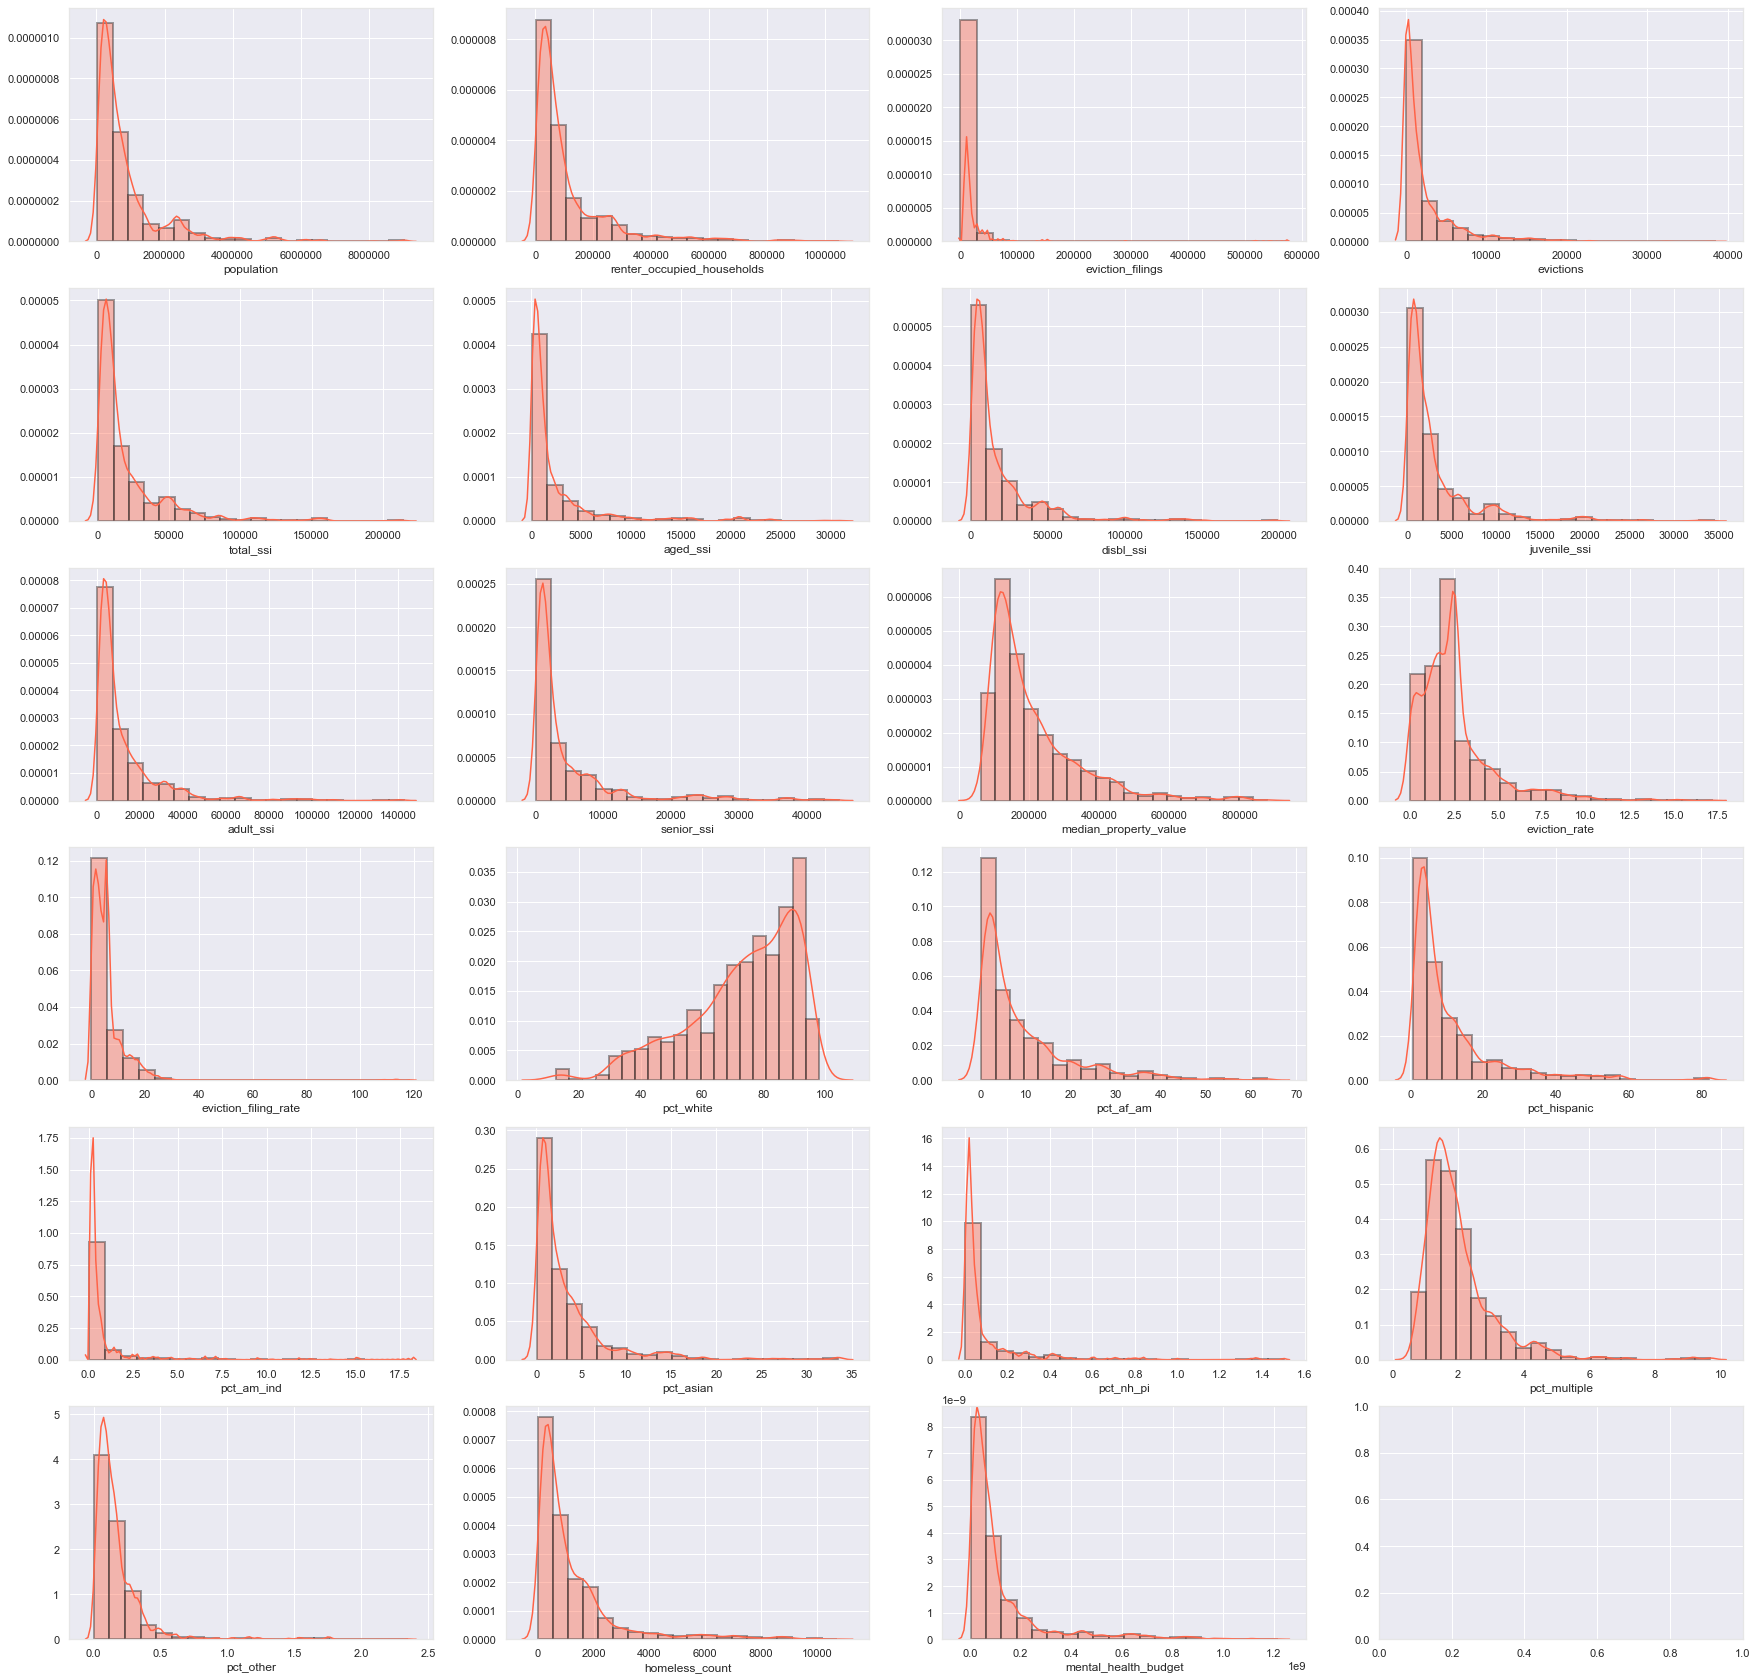

In [24]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(6,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

col = ''
idx = 0
for i in range(0,6):
    for j in range(0,4):
    
        if idx < len(cols):
            col = cols[idx]
    
    
            position = ax[i][j]
            vis = sns.distplot(df[col],bins=20, color='tomato', 
                               hist_kws= dict(edgecolor="k", linewidth=2), ax=position)
        
            idx = idx + 1
    

In [25]:
df_x = df.copy() #for later use

### Determine if taking the log of each feature will improve the distribution

In [26]:
for col in cols:
    name = col+"_log"
    df[name] = np.log(df[col])

In [27]:
log_cols = ['population_log', 'renter_occupied_households_log','eviction_filings_log',
        'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log', 'eviction_rate_log',
       'eviction_filing_rate_log', 'pct_white_log', 'pct_af_am_log',
       'pct_hispanic_log', 'pct_am_ind_log', 'pct_asian_log', 'pct_nh_pi_log',
       'pct_multiple_log', 'pct_other_log', 'homeless_count_log',
       'mental_health_budget_log']

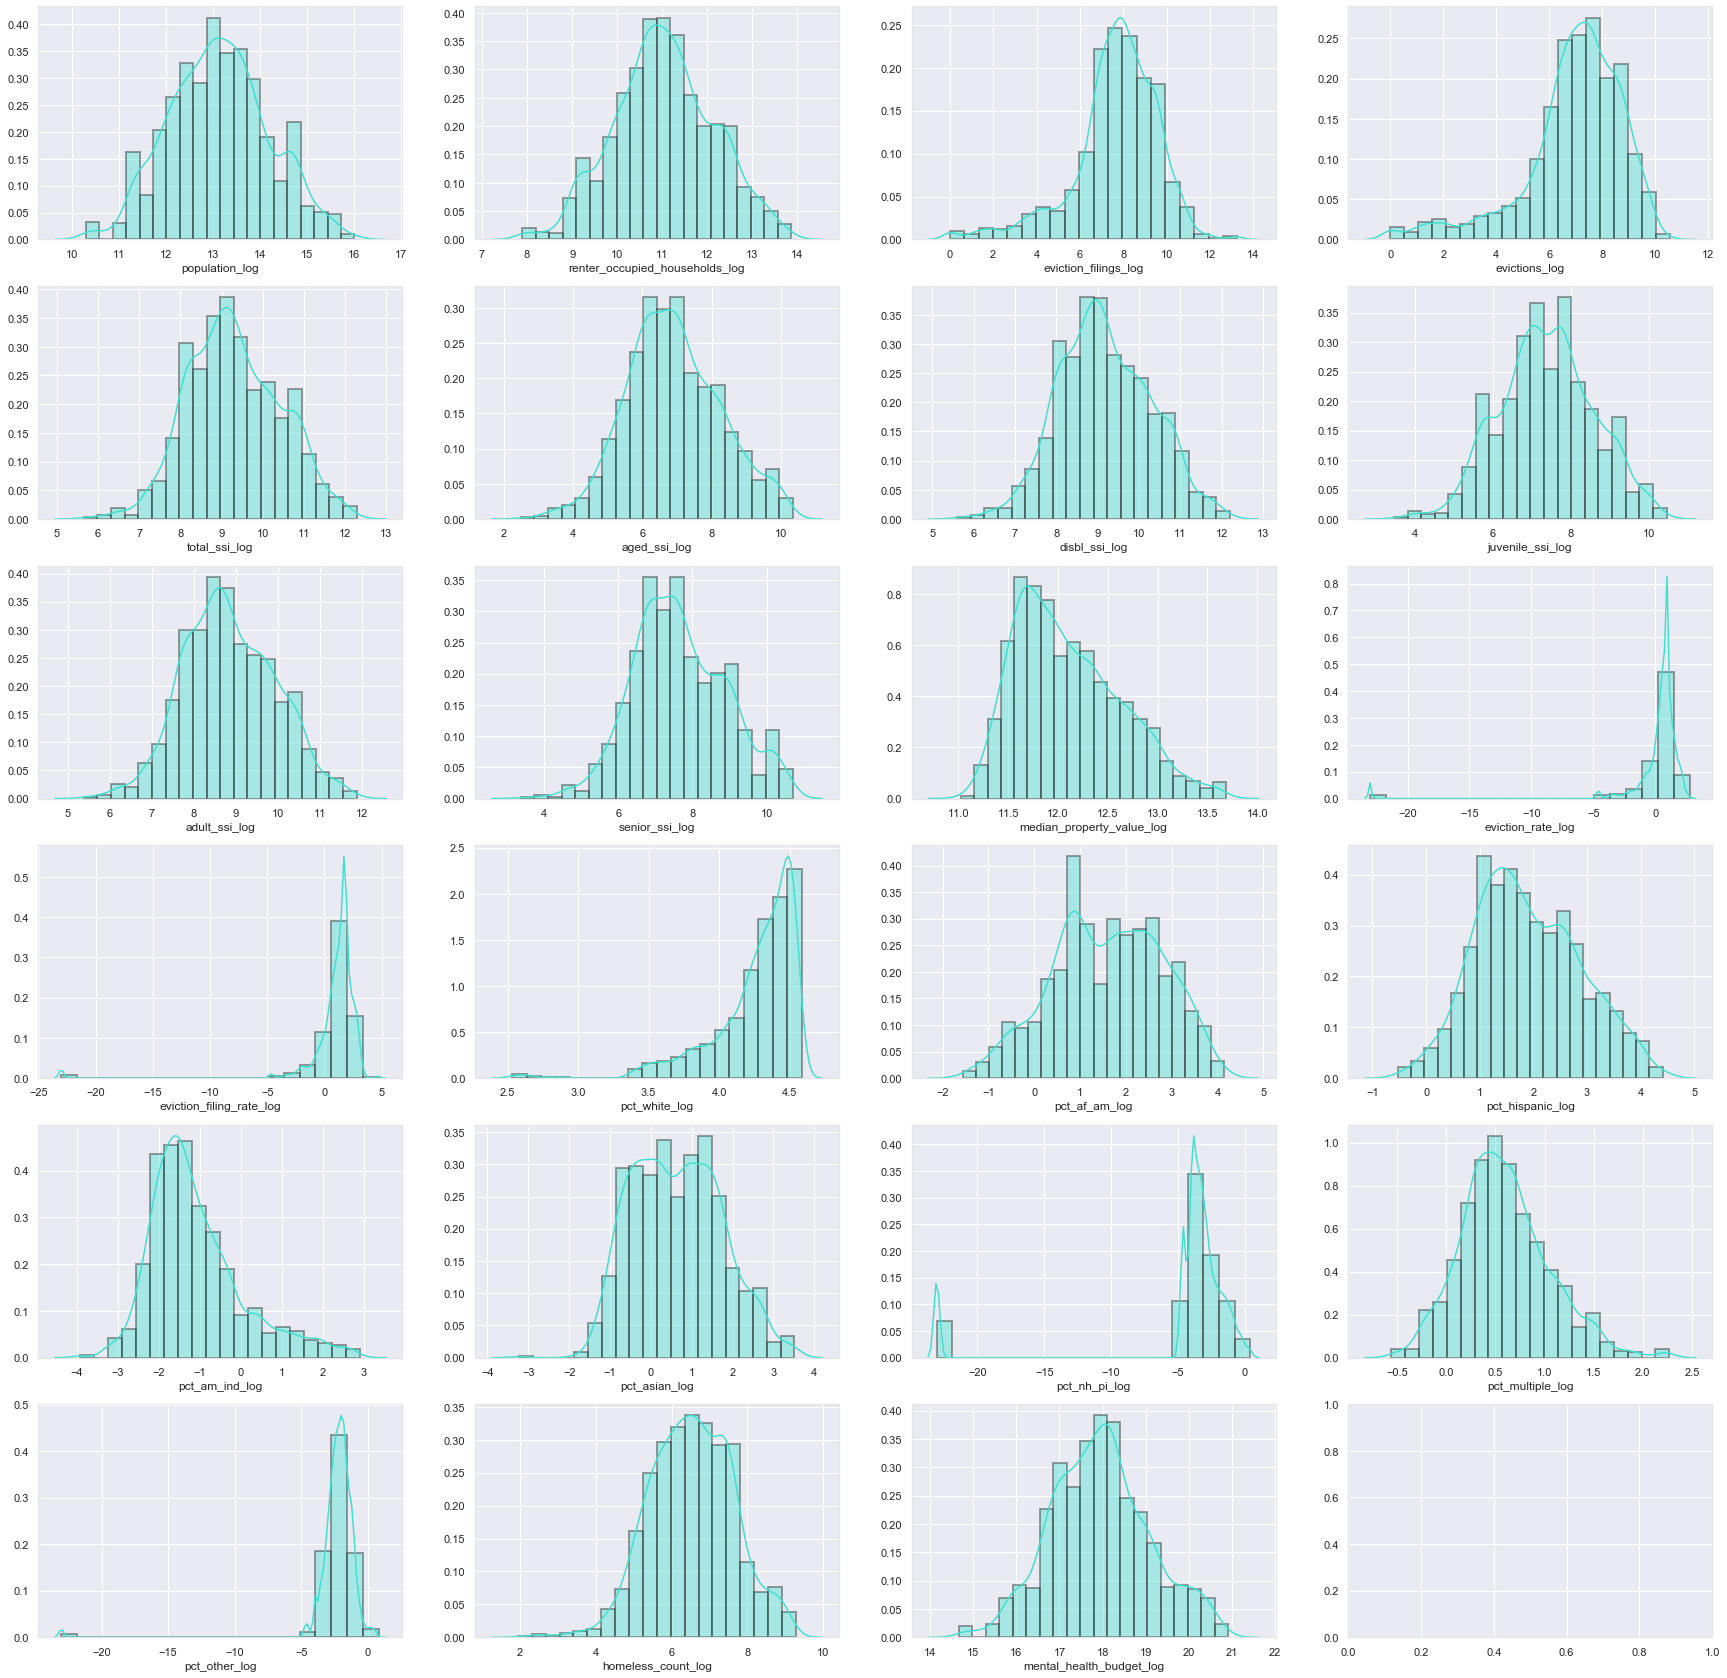

In [28]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(6,4,figsize = (30,30))
plt.rcParams["patch.force_edgecolor"] = True

c = ''
ix = 0
for i in range(0,6):
    for j in range(0,4):
    
        if ix < len(log_cols):
            c = log_cols[ix]
            position = ax[i][j]
            vis = sns.distplot((df[c][np.isfinite(df[c]) == True]), bins=20, color='turquoise',hist_kws= dict(edgecolor="k", linewidth=2), ax=position) 
            ix = ix + 1
    

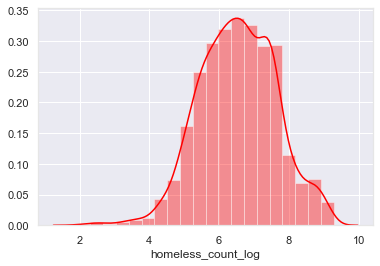

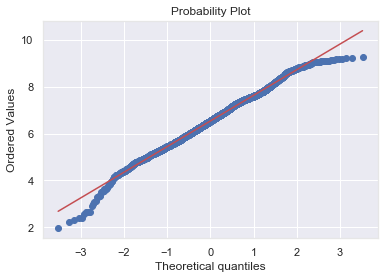

In [29]:
sns.distplot(df['homeless_count_log'],  bins=20, kde=True, color='red');
fig = plt.figure()
res = stats.probplot(df['homeless_count_log'], plot=plt) #outcome improved

not improved: eviction_rate_log, eviction_filing_rate_log, pct_white_log, pct_nh_pi_log, pct_other_log            

In [30]:
df.drop(['population', 'renter_occupied_households', 'eviction_filings',
       'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi', 'juvenile_ssi',
       'adult_ssi', 'senior_ssi','median_property_value', 
       'eviction_rate_log', 'eviction_filing_rate','pct_af_am', 'pct_hispanic',
       'pct_am_ind', 'pct_asian', 'pct_multiple', 'pct_other_log',
       'homeless_count','mental_health_budget','pct_white_log','pct_nh_pi_log'], axis=1, inplace=True)

In [31]:
df.columns

Index(['poverty_rate', 'median_gross_rent', 'median_household_income',
       'avg_rent_burden', 'eviction_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_nh_pi', 'pct_other',
       'population_log', 'renter_occupied_households_log',
       'eviction_filings_log', 'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log',
       'eviction_filing_rate_log', 'pct_af_am_log', 'pct_hispanic_log',
       'pct_am_ind_log', 'pct_asian_log', 'pct_multiple_log',
       'homeless_count_log', 'mental_health_budget_log'],
      dtype='object')

In [32]:
def no_infinite(x):
    if x <= 0:
        x = 0.0000000001
    return x

In [33]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: no_infinite(x))

### Liner Regression Model (with logged features)

In [34]:
outcome = 'homeless_count_log'

x_cols = ['poverty_rate', 'median_gross_rent', 'median_household_income',
       'avg_rent_burden', 'eviction_rate', 'unemploy_rate',
       'pct_renter_occupied', 'pct_white', 'pct_nh_pi', 'pct_other',
        'population_log', 'renter_occupied_households_log',
       'eviction_filings_log', 'evictions_log', 'total_ssi_log',
       'aged_ssi_log', 'disbl_ssi_log', 'juvenile_ssi_log', 'adult_ssi_log',
       'senior_ssi_log', 'median_property_value_log',
       'eviction_filing_rate_log', 'pct_af_am_log', 'pct_hispanic_log',
       'pct_am_ind_log', 'pct_asian_log', 'pct_multiple_log',
       'mental_health_budget_log']

predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data= df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     homeless_count_log   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:00:59   Log-Likelihood:                -3520.6
No. Observations:                3203   AIC:                             7099.
Df Residuals:                    3174   BIC:                             7275.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.1436      1.218     -0.939      0.348      -3.532       1.245
poverty_rate                      -0.0336      0.010     -3.482      0.001      -0.053      -0.015
median_gross_rent                  0.0011      0.000      4.725      0.000       0.001       0.002
median_household_income        -4.012e-05   4.12e-06     -9.735      0.000   -4.82e-05    -3.2e-05
avg_rent_burden                   -0.0592      0.008     -7.058      0.000      -0.076      -0.043
eviction_rate                      0.0155      0.010      1.524      0.128      -0.004       0.036
unemploy_rate                     -0.0057      0.006     -0.988      0.323      -0.017       0.006
pct_renter_occupied               -0.0045      0.006     -0.739      0.460      -0.016       0.007
pct_white                          0.0004      0.002      0.165      0.869      -0.004       0.005
pct_nh_pi                          0.3629      0.090      4.028      0.000       0.186       0.539
pct_other                         -0.3006      0.086     -3.492      0.000      -0.469      -0.132
population_log                     0.1577      0.166      0.951      0.342      -0.167       0.483
renter_occupied_households_log     0.2107      0.158      1.336      0.182      -0.099       0.520
eviction_filings_log              -0.0207      0.012     -1.726      0.084      -0.044       0.003
evictions_log                      0.0391      0.013      3.101      0.002       0.014       0.064
total_ssi_log                     -0.8824      0.381     -2.314      0.021      -1.630      -0.135
aged_ssi_log                       0.3162      0.105      3.013      0.003       0.110       0.522
disbl_ssi_log                      0.9834      0.429      2.293      0.022       0.143       1.824
juvenile_ssi_log                  -0.2444      0.109     -2.247      0.025      -0.458      -0.031
adult_ssi_log                      0.2017      0.352      0.572      0.567      -0.489       0.892
senior_ssi_log                     0.0801      0.198      0.406      0.685      -0.307       0.468
median_property_value_log          0.5787      0.083      7.007      0.000       0.417       0.741
eviction_filing_rate_log           0.1726      0.025      6.791      0.000       0.123       0.222
pct_af_am_log                     -0.1161      0.026     -4.395      0.000      -0.168      -0.064
pct_hispanic_log                   0.0566      0.028      1.994      0.046       0.001       0.112
pct_am_ind_log                    -0.0633      0.037     -1.699      0.089      -0.136       0.010
pct_asian_log                      0.0331      0.040      0.837      0.403      -0.044       0.111
pct_multiple_log                   0.0265      0.046      0.573      0.567      -0.064       0.117
mental_health_

### Polynomial Features

In [35]:
poly_df = df_x.copy()

In [36]:
#Train test split

target = poly_df['homeless_count']
features = poly_df.drop('homeless_count', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=27,test_size=0.2)

In [37]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit(X_train)
X_train_poly= pd.DataFrame(pf.transform(X_train), columns = pf.get_feature_names(features.columns))
X_test_poly= pd.DataFrame(pf.transform(X_test), columns = pf.get_feature_names(features.columns))

In [38]:
X_train_poly.head()

,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,juvenile_ssi,adult_ssi,senior_ssi,...,pct_nh_pi^2,pct_nh_pi pct_multiple,pct_nh_pi pct_other,pct_nh_pi mental_health_budget,pct_multiple^2,pct_multiple pct_other,pct_multiple mental_health_budget,pct_other^2,pct_other mental_health_budget,mental_health_budget^2
0,355810.0,48307.0,656.0,267.0,16624.0,1540.0,15084.0,3382.0,9924.0,3318.0,...,0.0004,0.0156,0.0038,481268.60,0.6084,0.1482,1.876948e+07,0.0361,4572051.70,5.790487e+14
1,1278842.0,186358.0,97.0,97.0,36107.0,2384.0,33723.0,6016.0,23568.0,6523.0,...,0.0004,0.0302,0.0020,6362092.80,2.2801,0.1510,4.803380e+08,0.0100,31810464.00,1.011906e+17
2,506763.0,83695.0,17564.0,5723.0,11384.0,988.0,10396.0,2486.0,7025.0,1873.0,...,0.0025,0.0955,0.0235,4014866.05,3.6481,0.8977,1.533679e+08,0.2209,37739740.87,6.447660e+15
3,955939.0,192460.0,13159.0,6784.0,43486.0,2431.0,41055.0,9769.0,27332.0,6385.0,...,0.0001,0.0236,0.0011,1039146.66,5.5696,0.2596,2.452386e+08,0.0121,11430613.26,1.079826e+16
4,2414359.0,286092.0,12301.0,3567.0,50036.0,3068.0,46835.0,9763.0,32035.0,8238.0,...,0.0036,0.0792,0.0036,40934353.14,1.7424,0.0792,9.005558e+08,0.0036,40934353.14,4.654504e+17


In [39]:
print(X_train_poly.shape, y_train.shape)
print(X_test_poly.shape, y_test.shape)

(2562, 434) (2562,)
(641, 434) (641,)


### Linear Regression Model - Polynomial Features

In [40]:
lm = linear_model.LinearRegression() #Regression with Interaction Features

In [41]:
lm.fit(X_train_poly, y_train)
y_train_pred = lm.predict(X_train_poly)

In [42]:
print("R2: %.2f" % r2_score(y_train, y_train_pred)) #could be overfitting 

R2: 0.86


In [43]:
y_test_pred = lm.predict(X_test_poly)

In [44]:
print("R2: %.2f" % r2_score(y_test, y_test_pred))

R2: 0.62


###  Logged Polynomial Features

In [45]:
log_poly_df = df.copy()

In [46]:
#Train test split
target_1 = log_poly_df['homeless_count_log']
features_1 = log_poly_df.drop('homeless_count_log', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(features_1, target_1, random_state=2,test_size=0.2)

In [47]:
pol = PolynomialFeatures(degree=2, include_bias=False)
pol.fit(Xtrain)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [48]:
Xtrain_log= pd.DataFrame(pol.transform(Xtrain), columns = pol.get_feature_names(features_1.columns))

In [49]:
Xtest_log= pd.DataFrame(pol.transform(Xtest), columns = pol.get_feature_names(features_1.columns))

In [50]:
print(Xtrain_log.shape, ytrain.shape)
print(Xtest_log.shape, ytest.shape)

(2562, 434) (2562,)
(641, 434) (641,)


### Linear Regression Model - Logged Polynomial Features

In [51]:
linreg = linear_model.LinearRegression()

In [52]:
linreg.fit(Xtrain_log, ytrain)
ytrain_pred = linreg.predict(Xtrain_log)

In [53]:
print("R2: %.2f" % r2_score(ytrain, ytrain_pred)) 

R2: 0.88


In [54]:
ytest_pred = linreg.predict(Xtest_log)

In [55]:
print("R2: %.2f" % r2_score(ytest, ytest_pred)) 

R2: 0.79


# Feature Selection

In [56]:
#Using Correlation Matrix to eliminate multicollinearity

In [57]:
corr_matrix = Xtrain_log.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [58]:
len(Xtrain_log.columns)

434

In [59]:
len(to_drop)

344

In [60]:
Xtrain_log.drop(to_drop, axis=1, inplace=True)

In [61]:
Xtest_log.drop(to_drop, axis=1, inplace=True)

In [62]:
Xtrain_log.shape

(2562, 90)

### Linear Regression - correlated features dropped

In [63]:
lm = linear_model.LinearRegression()

In [64]:
lm.fit(Xtrain_log, ytrain)

y_train_pred = lm.predict(Xtrain_log)


In [65]:
print("R2: %.2f" % r2_score(ytrain, y_train_pred))


R2: 0.66


In [66]:
#Scale and use regularization to eliminate features

In [67]:
def run_model(model,X_train,X_test,y_train,y_test):
    
    print('Training R^2 :',model.score(X_train,y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_train,y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :',model.score(X_test,y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

In [68]:
scalar = StandardScaler()
scalar.fit(Xtrain_log)
X_train_scaled  = scalar.transform(Xtrain_log)
X_test_scaled = scalar.transform(Xtest_log)

### Lasso Regularization

In [69]:
lasso = LassoCV(max_iter=100,cv=10)
lasso.fit(X_train_scaled, ytrain)
run_model(lasso ,X_train_scaled, X_test_scaled, ytrain, ytest)
print("The optimal alpha for the Lasso Regression is: ",lasso.alpha_)

Training R^2 : 0.6430957347895339
Training Root Mean Square Error 0.662799272598422

----------------

Testing R^2 : 0.6151658332915773
Testing Root Mean Square Error 0.6555001536675292
The optimal alpha for the Lasso Regression is:  0.000741780909264495


In [70]:
coeff_used = np.sum(lasso.coef_!=0)
print("Number of coefs: ", len(lasso.coef_))
print("Number at 0: ", sum(abs(lasso.coef_) < 10**(-10)))
print("Number of coef used: ",coeff_used)
 

Number of coefs:  90
Number at 0:  3
Number of coef used:  87


In [71]:
cols = Xtrain_log.columns[(lasso.coef_ != 0).tolist()]

In [72]:
len(cols)

87

In [73]:
X_train_scaled = Xtrain_log[cols]
X_test_scaled = Xtest_log[cols]

In [74]:
X_train_scaled.shape

(2562, 87)

# Hyper Parameter Tuning and Model Selection

### Linear Regression Model - SKlearn

In [75]:
lin_reg = linear_model.LinearRegression()

In [76]:
lin_reg.fit(X_train_scaled,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_tr_pred = lin_reg.predict(X_train_scaled)

In [78]:
y_te_pred = lin_reg.predict(X_test_scaled)

In [79]:
print("R2: %.2f" % r2_score(ytrain, y_tr_pred))
print("MSE: %.2f" % mean_squared_error(ytrain, y_tr_pred))
print('\n')
print("R2: %.2f" % r2_score(ytest, y_te_pred))
print("MSE: %.2f" % mean_squared_error(ytest, y_te_pred))

R2: 0.66
MSE: 0.42


R2: 0.63
MSE: 0.42


###  Decision Tree Regression

In [80]:
regressor = DecisionTreeRegressor(random_state = 0)

In [81]:
regressor.fit(X_train_scaled, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [82]:
y_train_predict = regressor.predict(X_train_scaled)

In [83]:
print("R2: ", r2_score(ytrain, y_train_predict))  #overfitting

R2:  0.9999999998619661


In [84]:
#Regression Tree using Grid Search
parameters={ 'min_samples_leaf' : range(5,200,15), 'max_depth': range(2,20,2)}

In [85]:
reg_tree = DecisionTreeRegressor(random_state = 0)
grid_tree= GridSearchCV(reg_tree, parameters, cv=5)
grid_tree.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(5, 200, 15)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [86]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.826950473678456
{'max_depth': 18, 'min_samples_leaf': 5}
DecisionTreeRegressor(criterion='mse', max_depth=18, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [87]:
y_pred_tree = grid_tree.best_estimator_.predict(X_test_scaled)

In [88]:
print("r2_score:",metrics.r2_score(ytest, y_pred_tree))
print("MSE:",metrics.mean_squared_error(ytest, y_pred_tree))

r2_score: 0.8269939867616568
MSE: 0.1931671049612127


### Random Forest Regressor

In [89]:
#Using Grid Search 
parameterz={'max_depth': range(2,20,2),'n_estimators': (10, 50, 100, 1000)}

In [90]:
reg_for = RandomForestRegressor(random_state = 0)

In [91]:
grid_forest = GridSearchCV(reg_for, parameterz, cv=5)

In [92]:
grid_forest.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 20, 2),
    

In [93]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.9105117395301697
{'max_depth': 18, 'n_estimators': 1000}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [94]:
y_pred_forest = grid_forest.best_estimator_.predict(X_test_scaled)

In [95]:
print("r2_score:",metrics.r2_score(ytest, y_pred_forest))

r2_score: 0.9319840415863123


In [96]:
#run model again with best parameters

In [113]:
r_forest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [114]:
r_forest.fit(X_train_scaled, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [115]:
predict_train = r_forest.predict(X_train_scaled)

In [116]:
predict_forest = r_forest.predict(X_test_scaled)

In [117]:
print("r2_training_score:", metrics.r2_score(ytrain,predict_train))

r2_training_score: 0.9898619364992659


In [118]:
print("r2__validation_score:",metrics.r2_score(ytest, predict_forest))

r2__validation_score: 0.9319840415863123


In [119]:
print("MSE:",metrics.mean_squared_error(ytest, predict_forest))

MSE: 0.07594213364037238


In [120]:
r_forest.feature_importances_

array([5.08710952e-03, 4.64460427e-03, 8.14883895e-03, 6.09608798e-03,
       2.25248804e-03, 1.43192778e-03, 1.75779089e-02, 5.50749289e-03,
       3.02176242e-02, 1.93446865e-03, 9.23618289e-02, 6.25542965e-03,
       4.43121014e-01, 9.76535600e-03, 1.57827989e-03, 8.06687349e-03,
       4.86592081e-03, 8.07597826e-04, 4.09512592e-03, 2.06340230e-03,
       1.89152115e-02, 3.28585243e-03, 2.71484840e-03, 2.39069579e-03,
       3.25787389e-03, 9.58636643e-03, 4.12189458e-03, 4.11820608e-03,
       5.01639006e-03, 4.51011989e-03, 9.47975119e-03, 1.84426164e-03,
       3.81732139e-03, 4.52186893e-03, 4.60780826e-03, 6.64240414e-03,
       4.40608598e-03, 1.60236096e-03, 8.20624923e-03, 2.12163531e-03,
       3.55868722e-03, 3.26412990e-03, 2.03229774e-02, 1.03669980e-03,
       2.09640217e-03, 2.67839911e-03, 1.86818979e-03, 2.40823478e-03,
       1.39192169e-03, 2.15724533e-03, 2.64464354e-03, 3.39021135e-03,
       2.06007762e-03, 2.65809951e-03, 2.46406034e-02, 5.41509798e-03,
      

In [121]:
feature_importances = pd.DataFrame(r_forest.feature_importances_, index = X_train_scaled.columns, columns=['importance']).sort_values('importance',ascending=False)

In [122]:
feature_importances[0:10]

,importance
aged_ssi_log,0.443121
population_log,0.092362
population_log median_property_value_log,0.052534
pct_nh_pi,0.030218
pct_renter_occupied pct_white,0.024641
eviction_rate pct_hispanic_log,0.020323
mental_health_budget_log,0.018915
pct_renter_occupied,0.017578
median_property_value_log,0.009765
poverty_rate eviction_filings_log,0.009586


### XGBoost with Regression

In [101]:
parameters_xgb = { 'max_depth':[ 3, 4, 5, 6, 8, 10, 12, 15],
   'gamma':[1.0],
   'learning_rate':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
   'subsample':[0.05], 'min_child_weight': [ 1, 3, 5, 7 ], 'n_jobs':[4]}

In [102]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror')

In [103]:
xgb_reg = GridSearchCV(xgb_model, parameters_xgb, cv=5)

In [104]:
xgb_reg.fit(X_train_scaled, ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_st...eg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'gamma': [1.0],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                

In [105]:
print(xgb_reg.best_score_)
print(xgb_reg.best_params_)
print(xgb_reg.best_estimator_)

0.7264665140803521
{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_jobs': 4, 'subsample': 0.05}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)


In [106]:
y_pred_xgb = xgb_reg.best_estimator_.predict(X_test_scaled)

In [107]:
print("r2_score:",metrics.r2_score(ytest, y_pred_xgb))

r2_score: 0.7456563868365629


In [123]:
xgb_ = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)

In [124]:
xgb_.fit(X_train_scaled, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=1.0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=4, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.05, verbosity=1)

In [125]:
y_p = xgb_.predict(X_test_scaled)

In [126]:
print("r2_score:",metrics.r2_score(ytest, y_p))

r2_score: 0.7456563868365629


In [127]:
print("MSE:",metrics.mean_squared_error(ytest, y_p))

MSE: 0.2839833049760547
